##### Reading Source File and Checking Data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [48]:
# reading source file
#whitespace separator \s+
file = pd.read_csv("http://users.stat.ufl.edu/~winner/data/airq402.dat", sep = '\s+', engine = 'python', header = None)

In [49]:
# Adding colunm names as mentioned in data file
file.columns = ['City1', 'City2', 'Average Flight Fare', 'Distance','Average Weekly Passengers',
                'Market Leading Airline (MLA)','Market Share MLA', 'Average MLA Fare', 
                'Low Price Airline (LPA)', 'Market Share LPA', 'Average LPA Fare']

##### Data Cleaning  

In [50]:
# getting total number of rows and column in the dataframe
file_shape = file.shape
print("The number of rows in the dataset is {} and the number of columns is {}".format(file_shape[0],file_shape[1]))

The number of rows in the dataset is 1000 and the number of columns is 11


In [51]:
#Method 1
file.duplicated().sum()

0

In [52]:
#Method 2
# Check for duplicate records
len(file[file.duplicated()])

# No Duplicates found

0

In [53]:
# Checking Null colunms
file.isnull().sum().sum()

print("The total null values in this dataset are {}".format(file.isnull().sum().sum()))

The total null values in this dataset are 0


In [54]:
# Checking data type of each colunm to check if any type needs to be changed
file.dtypes

City1                            object
City2                            object
Average Flight Fare             float64
Distance                          int64
Average Weekly Passengers       float64
Market Leading Airline (MLA)     object
Market Share MLA                float64
Average MLA Fare                float64
Low Price Airline (LPA)          object
Market Share LPA                float64
Average LPA Fare                float64
dtype: object

In [55]:
# Checking basic details of the data
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City1                         1000 non-null   object 
 1   City2                         1000 non-null   object 
 2   Average Flight Fare           1000 non-null   float64
 3   Distance                      1000 non-null   int64  
 4   Average Weekly Passengers     1000 non-null   float64
 5   Market Leading Airline (MLA)  1000 non-null   object 
 6   Market Share MLA              1000 non-null   float64
 7   Average MLA Fare              1000 non-null   float64
 8   Low Price Airline (LPA)       1000 non-null   object 
 9   Market Share LPA              1000 non-null   float64
 10  Average LPA Fare              1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [56]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Flight Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average Weekly Passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
Market Share MLA,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average MLA Fare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
Market Share LPA,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
Average LPA Fare,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


Observations:
1. Average Flight Fare may contain some outliers on the lower end and many outliers on the upper end. We can say this by looking at the range and the 5-point summary.
2. Average Weekly Passengers feature has a high possibility of outliers on the upper end, considering the range, mean, median and the percentile values
3. Interesting observation - We may expect the average fare of Low Price Airlines (LPA) to be much lower than the Average Fare of Market Leading Airlines. But looking at the data, we can see that the difference between the average price of the two is not very high. It suggests that both types of airlines are able to offer similar average fare on the flights. It may also suggest that the type of airlines based on market share may not have too much influence of the target variable (flight price).

In [57]:
file.describe(include='O').T

,count,unique,top,freq
City1,1000,90,ATL,64
City2,1000,85,TPA,46
Market Leading Airline (MLA),1000,16,WN,257
Low Price Airline (LPA),1000,19,WN,230


##### Exploratory Data Analysis 

<Axes: title={'center': 'Boxplot - Average LPA Fare'}, xlabel='Average LPA Fare'>

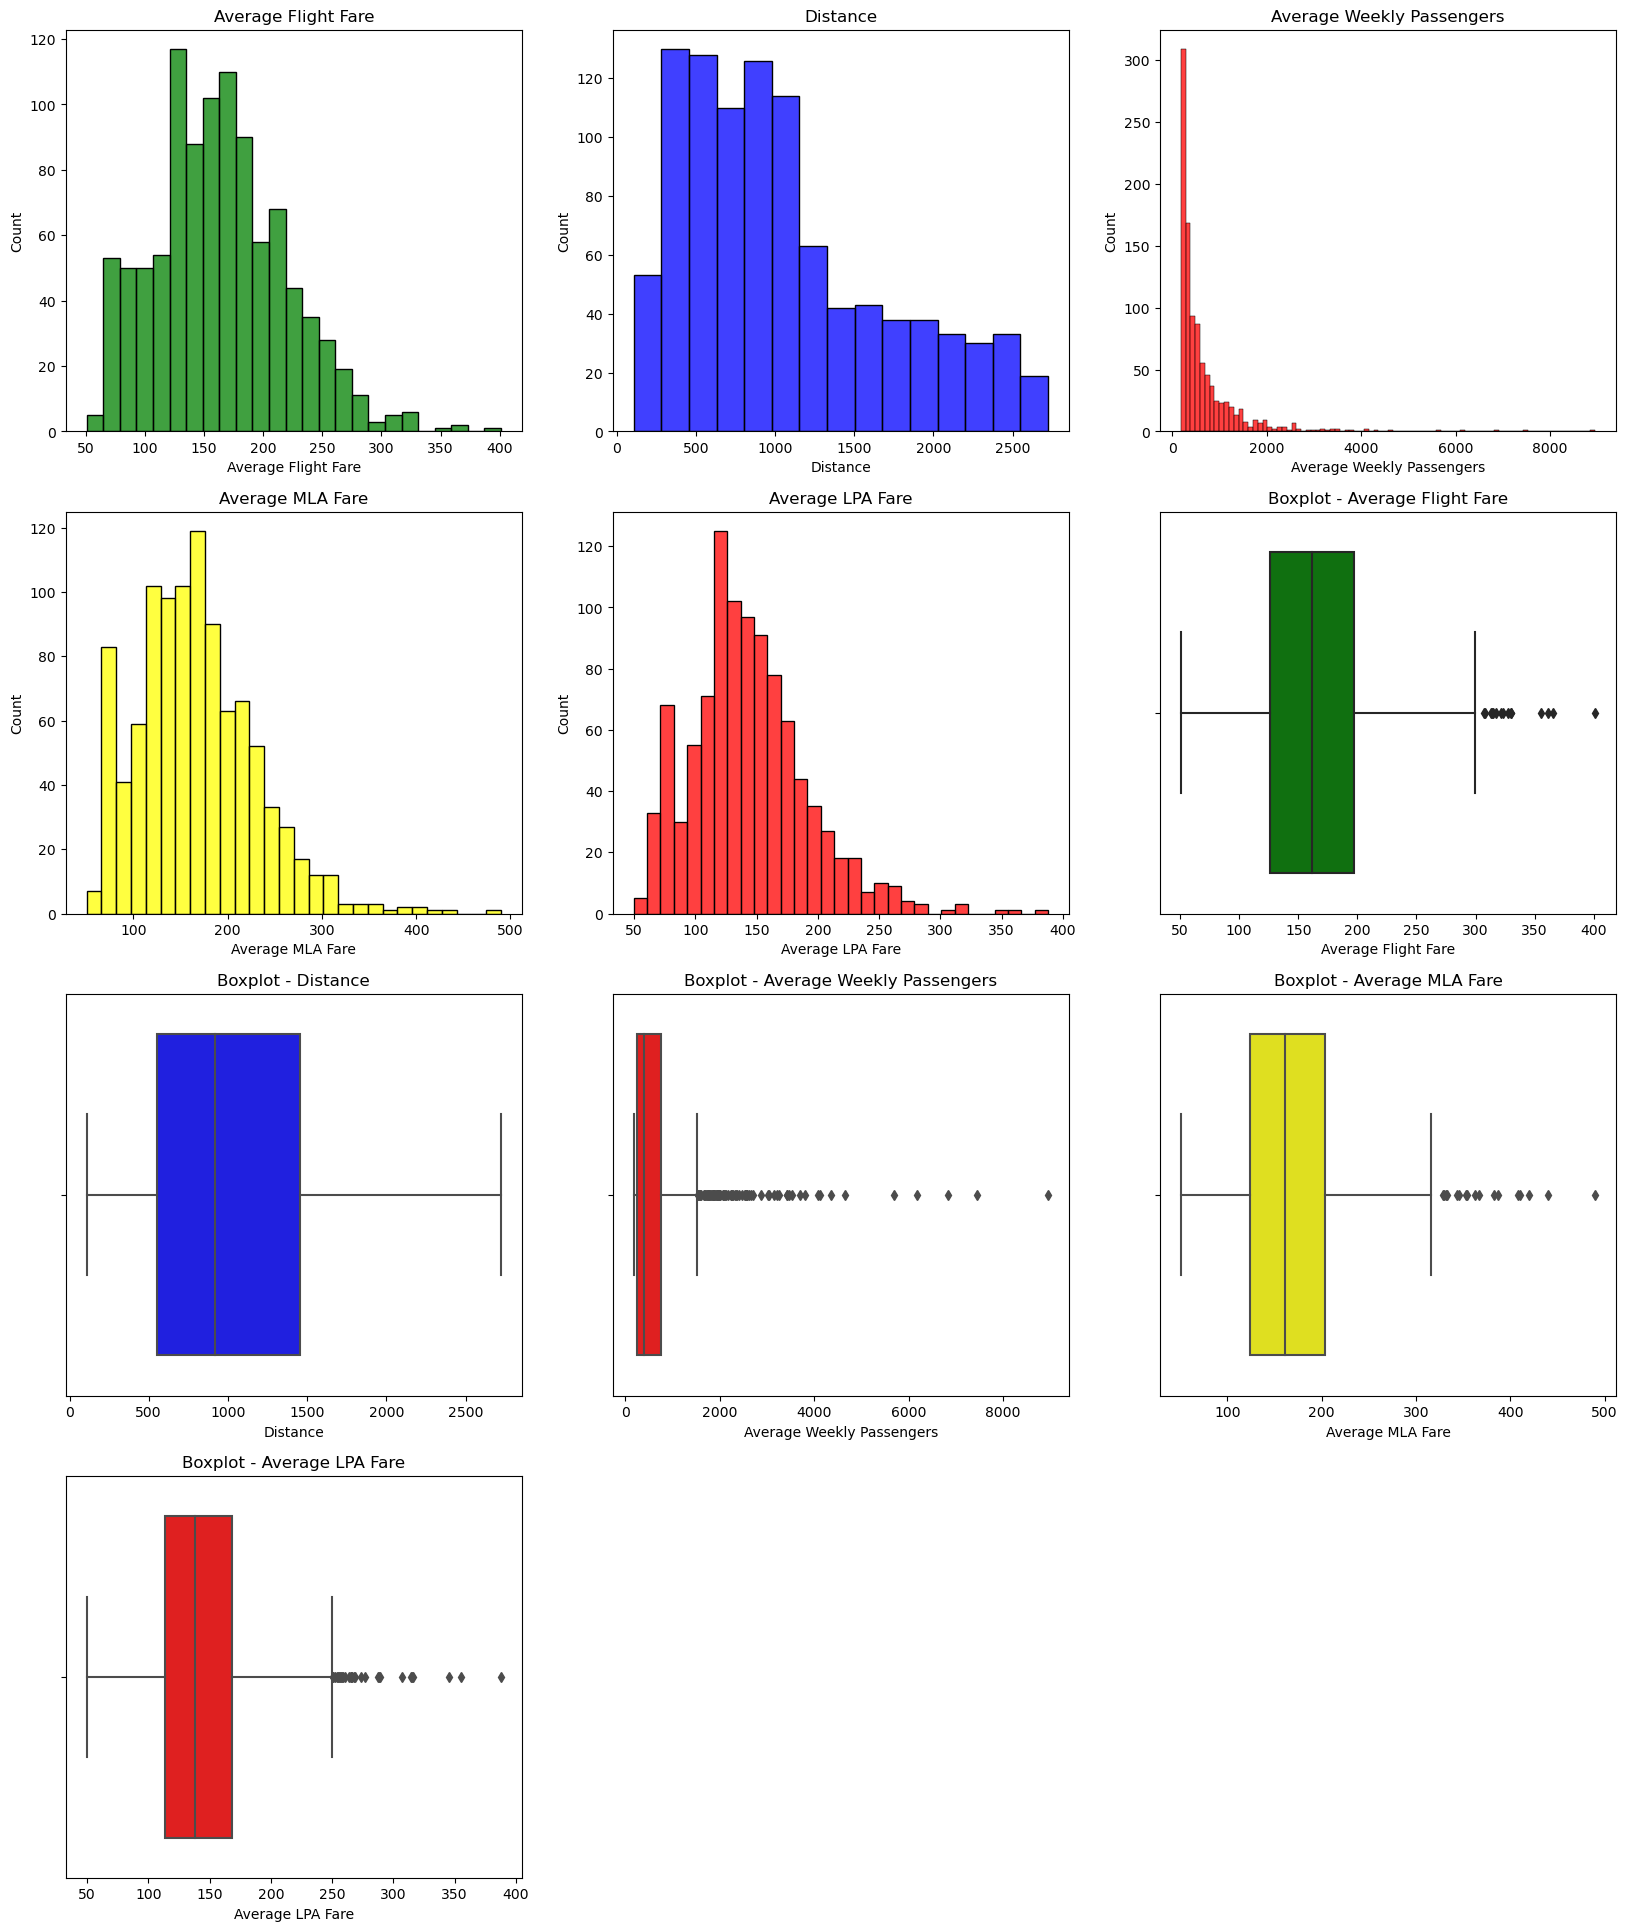

In [58]:
#subplot(rows,columns,position)
plt.figure(figsize=(20,24))

#first subplot - 1st row, 1st column
plt.subplot(4,3,1)
plt.title('Average Flight Fare')
sns.histplot(data=file, x = 'Average Flight Fare',color='green')

#second subplot - 1st row, 2nd column
plt.subplot(4,3,2)
plt.title('Distance')
sns.histplot(data=file, x='Distance',color='blue')

#third subplot - 1st row, 3rd column
plt.subplot(4,3,3)
plt.title('Average Weekly Passengers')
sns.histplot(data=file,x='Average Weekly Passengers',color='red')

#fourth subplot - 2nd row, 1st column
plt.subplot(4,3,4)
plt.title('Average MLA Fare')
sns.histplot(data=file, x='Average MLA Fare',color='yellow')

#fifth subplot - 2nd row, 2nd column
plt.subplot(4,3,5)
plt.title('Average LPA Fare')
sns.histplot(data=file, x='Average LPA Fare',color='red')

#sixth subplot - 2nd row, 3rd column
plt.subplot(4,3,6)
plt.title('Boxplot - Average Flight Fare')
sns.boxplot(data=file, x = 'Average Flight Fare',color='green')

#Subplot 7 - 3rd row, 1st column
plt.subplot(4,3,7)
plt.title('Boxplot - Distance')
sns.boxplot(data=file, x='Distance',color='blue')

#Subplot 8 - 3rd row, 2nd column
plt.subplot(4,3,8)
plt.title('Boxplot - Average Weekly Passengers')
sns.boxplot(data=file,x='Average Weekly Passengers',color='red')

#Subplot 9 - 3rd row, 3rd column
plt.subplot(4,3,9)
plt.title('Boxplot - Average MLA Fare')
sns.boxplot(data=file, x='Average MLA Fare',color='yellow')

#subplot 10 - 4th row, 1st column
plt.subplot(4,3,10)
plt.title('Boxplot - Average LPA Fare')
sns.boxplot(data=file, x='Average LPA Fare',color='red')




Inferences:
1. The average fare for both MLA and LPA seem to be similar in the range of 100 to 300 with some outliers in the similar range
2. Average weekly passengers has many outliers. Most values are concentrated in the lower range
3. Average flight fare seems to be distributed almost normally across the range with few outliers

In [59]:
file.columns

Index(['City1', 'City2', 'Average Flight Fare', 'Distance',
       'Average Weekly Passengers', 'Market Leading Airline (MLA)',
       'Market Share MLA', 'Average MLA Fare', 'Low Price Airline (LPA)',
       'Market Share LPA', 'Average LPA Fare'],
      dtype='object')

##### Bivariate Analysis  

<Axes: >

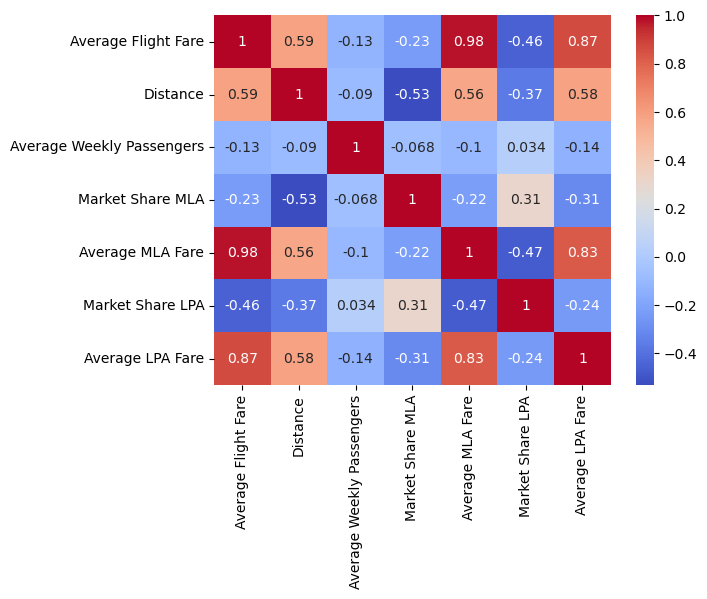

In [60]:
sns.heatmap(file.corr(),annot=True,cmap="coolwarm")


-------------------

The data seems to have quite a lot of multicollinearity which may affect the model performance

<Axes: xlabel='Low Price Airline (LPA)', ylabel='Average Flight Fare'>

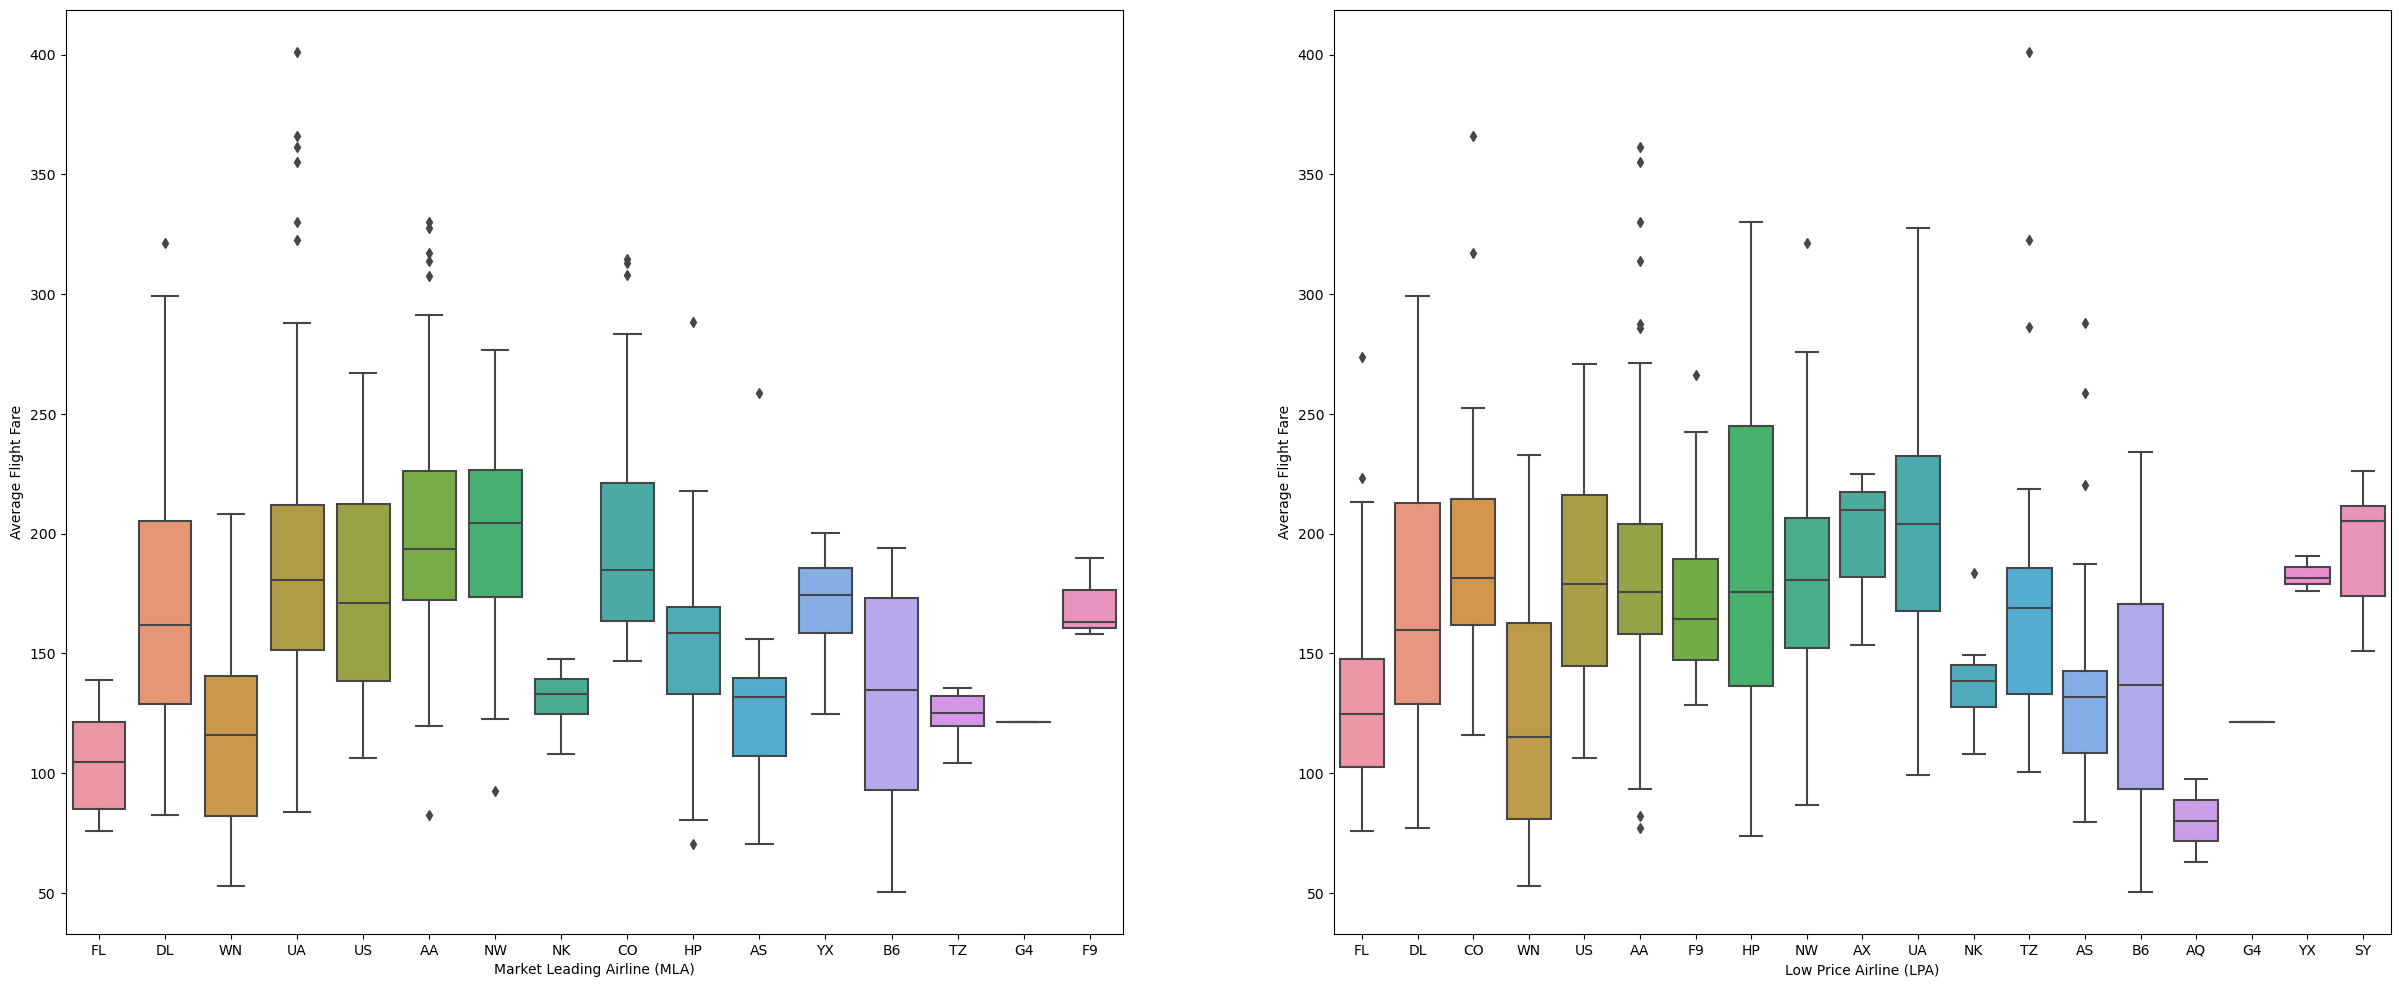

In [61]:
#conditional boxplot to understand the relationships between the Average Flight Fare and the variables better
plt.figure(figsize = (30,12))
plt.subplot(1,2,1)
sns.boxplot(x='Market Leading Airline (MLA)',y='Average Flight Fare', data = file)
plt.subplot(1,2,2)
sns.boxplot(x='Low Price Airline (LPA)', y = 'Average Flight Fare', data = file)

Inferences:
1. Most flights have comparable median flight fare with some having very low values
2. Flight fare of market leading airlines and low price airlines seem to fall in the similar range

##### Multivariate Plot and Scatter Plot

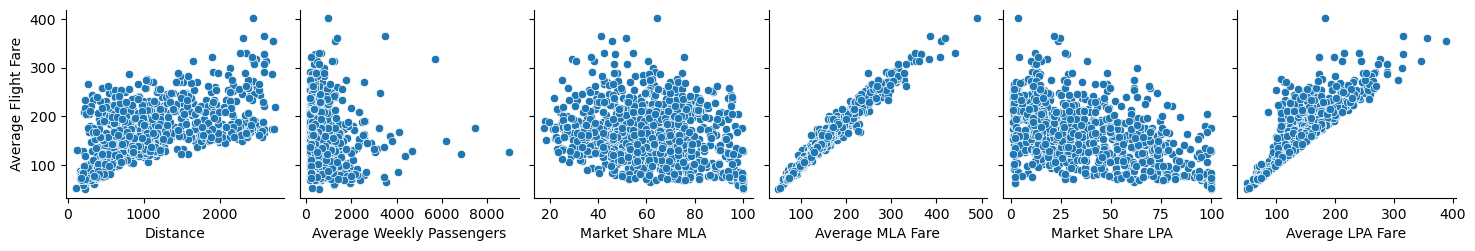

In [62]:
sns.pairplot(file, y_vars = 'Average Flight Fare', x_vars = ['Distance','Average Weekly Passengers','Market Share MLA',
                                                            'Average MLA Fare','Market Share LPA','Average LPA Fare'])

Inferences:
1. Average flight fare seems to have mild correlation with distance
2. Average weekly passengers doesn't seem to have any effect on the average flight fare
3. Market Shares of both MLA and LPA don't have any correlation with the Average Flight Fare
4. Highest correlation can be seen between Average Flight Fare and Average MLA Fare
5. Average LPA Fare also seems to have a high correlation but it's not as strong as the one with Average MLA Fare
6. These inferences suggest that Average MLA Fare and Average LPA Fare can be highly significant predictors of the Average Flight Fare
7. We also saw a high correlation amongst Average MLA Fare and Average LPA Fare
8. This might suggest the fact that market leading airlines dominate the fare prices and influence the prices set of the low price airlines as well

We can consider the assumption that the correlation of Average flight fare with Distance and Average Weekly Passengers is because they are not scaled. We can explore this possiblity further by log transformation of these variables and checking the correlation again.

In [63]:
#Log transformation of independent variables
D1 = np.log(file['Distance'])
D2 = np.log(file['Average Weekly Passengers'])
D3 = np.log(file['Market Share MLA'])
D4 = np.log(file['Average MLA Fare'])
D5 = np.log(file['Market Share LPA'])
D6 = np.log(file['Average LPA Fare'])

In [64]:
file.columns

Index(['City1', 'City2', 'Average Flight Fare', 'Distance',
       'Average Weekly Passengers', 'Market Leading Airline (MLA)',
       'Market Share MLA', 'Average MLA Fare', 'Low Price Airline (LPA)',
       'Market Share LPA', 'Average LPA Fare'],
      dtype='object')

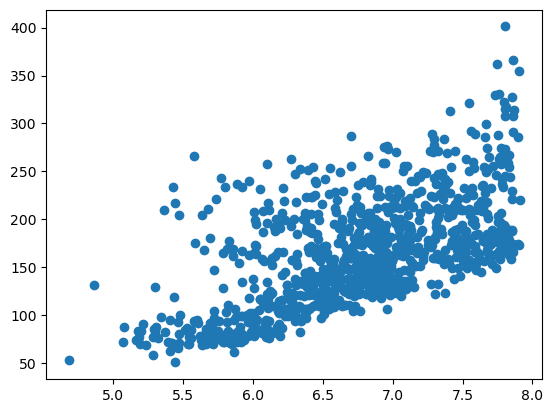

In [65]:
plt.scatter(D1,file['Average Flight Fare'])

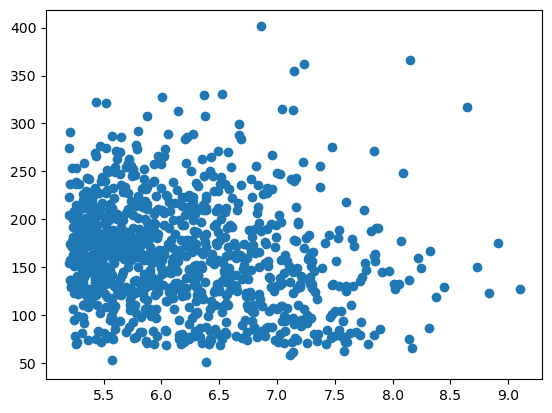

In [66]:
plt.scatter(D2, file['Average Flight Fare'])

Log transformation does not seem to make much difference in the correlation between Average Fare with Distance and Average Weekly Passengers. So we'll discard our assumption that the low correlation was because the variables were not scaled. In the model, we will use the raw values and not the log transformed values in this case.

##### Multi Linear Regression Model 

In [67]:
file.columns

Index(['City1', 'City2', 'Average Flight Fare', 'Distance',
       'Average Weekly Passengers', 'Market Leading Airline (MLA)',
       'Market Share MLA', 'Average MLA Fare', 'Low Price Airline (LPA)',
       'Market Share LPA', 'Average LPA Fare'],
      dtype='object')

In [68]:
#Dropping the city names and Flight name columns as they are not actionable and their associated numeric features are being included in the model
file.drop(columns = ['City1','City2','Market Leading Airline (MLA)','Low Price Airline (LPA)'],axis=1,inplace=True)

In [69]:
file.columns

Index(['Average Flight Fare', 'Distance', 'Average Weekly Passengers',
       'Market Share MLA', 'Average MLA Fare', 'Market Share LPA',
       'Average LPA Fare'],
      dtype='object')

In [70]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Average Flight Fare        1000 non-null   float64
 1   Distance                   1000 non-null   int64  
 2   Average Weekly Passengers  1000 non-null   float64
 3   Market Share MLA           1000 non-null   float64
 4   Average MLA Fare           1000 non-null   float64
 5   Market Share LPA           1000 non-null   float64
 6   Average LPA Fare           1000 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


##### Rescaling the Features  

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

In [73]:
variables = list(file.columns)


In [74]:
variables

['Average Flight Fare',
 'Distance',
 'Average Weekly Passengers',
 'Market Share MLA',
 'Average MLA Fare',
 'Market Share LPA',
 'Average LPA Fare']

In [75]:
file[variables] = scaler.fit_transform(file[variables])

In [76]:
file.head()

,Average Flight Fare,Distance,Average Weekly Passengers,Market Share MLA,Average MLA Fare,Market Share LPA,Average LPA Fare
0,0.182344,0.160550,0.027727,0.637877,0.137676,0.698706,0.181539
1,0.205155,0.287462,0.010882,0.697522,0.165116,0.163432,0.204918
2,0.467338,0.284404,0.003917,0.743562,0.394667,0.017283,0.347324
3,0.053834,0.068807,0.048513,0.963192,0.041728,0.969375,0.056897
4,0.306835,0.235092,0.015010,0.268586,0.252190,0.144330,0.283185


##### Splitting Data into Training and Test 

In [77]:
from sklearn.model_selection import train_test_split
file_train, file_test = train_test_split(file, train_size = 0.7, test_size = 0.3, random_state = 100)

In [78]:
Y_train = file_train.pop('Average Flight Fare')
X_train = file_train

In [79]:
Y_test = file_test.pop('Average Flight Fare')
X_test = file_test

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_model = lr.fit(X_train, Y_train)

In [81]:
lr_model.coef_

array([ 0.01608207, -0.01847207,  0.01984823,  0.88350961, -0.02116117,
        0.21999856])

In [82]:
lr_model.intercept_

0.01963269553646807

In [83]:
print(lr_model.score(X_train, Y_train))

0.9734680065850925


In [84]:
print(lr_model.score(X_test, Y_test))

0.9756468855793664


In [85]:
#Model Prediction
y_pred = lr_model.predict(X_test)

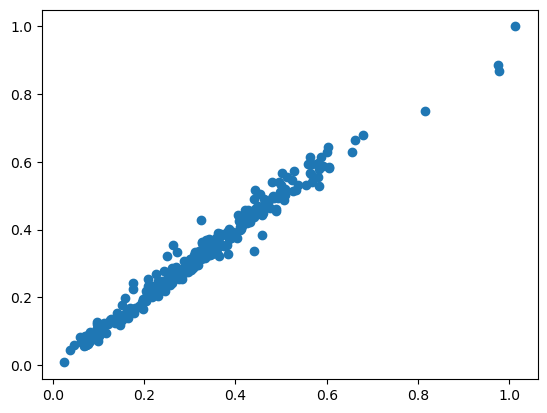

In [86]:
#Very high linear correlation between actual and predicted Y values through the model
plt.scatter(y_pred, Y_test)

In [87]:
#getting more model metrics from the sklearn library
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

MSE = mean_squared_error(Y_test, y_pred)
r_square = r2_score(Y_test, y_pred)
std_error = sqrt(MSE)

In [88]:
print("The Mean Squared Error is ",MSE)
print("The standard error is ",std_error)
print("The R-squared value is ",r_square)

The Mean Squared Error is  0.0006235276486579628
The standard error is  0.024970535610153874
The R-squared value is  0.9756468855793664


<font size=4 color='green'>  **Conclusions:** </font> 

This is a very high performing model with about 97% R-squared value. It means that this model is able to explain the variance in Average Flight Fare with about 97% accuracy. The predicted values have a very high correlation with the actual values. Hence, we can safely use this model to predict the average flight fare.